In [35]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, KFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.utils import resample
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, matthews_corrcoef

data = pd.read_csv('data.csv', header=None).values
labels = pd.read_csv('labels.csv',header=None).values

training_set = data[:179,:]
test_set = data[179:,:]



In [13]:
# Base-line experiments (25/75 points): Perform N-fold cross validation experiments
# (that includes preprocessing) with kNN and Decision Trees. Evaluate classwise training
# and validation errors for different preprocessing and different settings (k for kNN and
# pruning, kind of splits, etc. for DT). Use knowledge from your descriptive exploratory
# analysis to improve the performance. 

#Do you observe overfitting? How do you tackle
# it? KNN as well as Decision Trees are very intuitive interpretable classifiers. Can you
# confirm certain findings from the exploratory analysis?

collection = np.c_[training_set,labels]
x =pd.DataFrame(collection)
class1 = collection[collection[:,-1]==1] 
class2 = collection[collection[:,-1]==2] #length of class 2 is less than class 1

#oversampling the data
class2_upsampled = resample(class2, replace=True, n_samples = class1[:,0].size, random_state=10)
combined_upsample = np.vstack((class1, class2_upsampled))


#undersampling the data
class1_undersampled = pd.DataFrame(class1).sample(random_state=1,n= class2[:,0].size).values
combined_undersample = np.vstack((class1_undersampled,class2)) 


In [84]:
#KNN with Grid Search CV

scorer = make_scorer(matthews_corrcoef) 
# range of K nearest neighbor values
k = np.arange(1,20) 
weight_options = ["uniform", "distance"]
param_grid = dict(n_neighbors = k,weights=weight_options)

scores =[]
combinations =[]

#Train_test split for oversampled data
X_otrain, X_otest, Y_otrain, Y_otest = train_test_split(combined_upsample[:,:-1], combined_upsample[:,-1], test_size=0.3, random_state=10)
for cvv in [10,20]:
    
    knn = KNeighborsClassifier()

    gridsearch_knn = GridSearchCV(knn,param_grid, cv=cvv, n_jobs=-1, verbose=0, scoring=scorer)
    gridsearch_knn.fit(X_otrain, Y_otrain)
    mean_test_scores = gridsearch_knn.cv_results_['mean_test_score']  
    
#     combinations.append(np.c_[mean_test_scores])
    
    pairs = []
    number_of_permutations = len(gridsearch_knn.cv_results_['params'])
    for x in range(number_of_permutations):
        pairs.append((gridsearch_knn.cv_results_['params'][x]['n_neighbors'],gridsearch_knn.cv_results_['params'][x]['weights'],gridsearch_knn.cv_results_['mean_test_score'][x]))

print(pd.DataFrame(pairs))
# print(gridsearch_knn.best_estimator_)

     0         1         2
0    1   uniform  0.981651
1    1  distance  0.981651
2    2   uniform  0.964559
3    2  distance  0.981651
4    3   uniform  0.964559
5    3  distance  0.981651
6    4   uniform  0.964559
7    4  distance  0.981651
8    5   uniform  0.964453
9    5  distance  0.973128
10   6   uniform  0.895948
11   6  distance  0.973128
12   7   uniform  0.868039
13   7  distance  0.939359
14   8   uniform  0.905924
15   8  distance  0.956293
16   9   uniform  0.905924
17   9  distance  0.964816
18  10   uniform  0.905924
19  10  distance  0.974641
20  11   uniform  0.897507
21  11  distance  0.966224
22  12   uniform  0.872884
23  12  distance  0.966224
24  13   uniform  0.863059
25  13  distance  0.966224
26  14   uniform  0.872990
27  14  distance  0.974535
28  15   uniform  0.872990
29  15  distance  0.974535
30  16   uniform  0.865848
31  16  distance  0.966936
32  17   uniform  0.855683
33  17  distance  0.974535
34  18   uniform  0.813893
35  18  distance  0.966012
3

Text(0,0.5,'Mean Test Score')

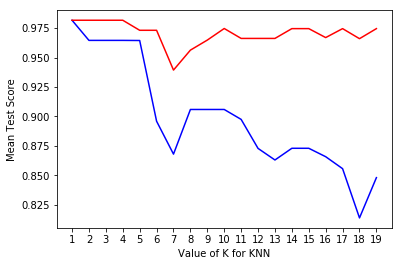

In [140]:
import matplotlib.pyplot as plt
stacked = np.stack(pairs)
x=stacked[stacked[:,1]=='uniform'][:,0]
y= stacked[stacked[:,1]=='uniform'][:,2]
y = [float(i) for i in y]

x1=stacked[stacked[:,1]=='distance'][:,0]
y1= stacked[stacked[:,1]=='distance'][:,2]

y1 = [float(i) for i in y1]

plt.plot(x,y,'b-',x1,y1,'r-')
plt.xlabel('Value of K for KNN')
plt.ylabel('Mean Test Score')
